# Оценка результатов A/B-теста

## Цели и ход исследования

Из открытых источников в нашем распоряжении находится датасет, описывающий действия пользователей, техническое задание, а также несколько вспомогательных датасетов. С целью определения ожидаемого эффекта необходимо оценить корректность проведения теста и проанализируйте его результаты.

**Цели исследования:**
1. Ознакомится с датасетами и выполнить первичную предобработку данных;
2. Проверить и скорректировать данные в соответствии с техническим заданием;
3. Провести исследовательский анализ данных;
4. Оценить результаты A/B-тестирования;
5. Сформировать общие выводы.

## Предобработка данных

### Ознакомление с данными

Импортируем необходимые для работы библиотеки и присвоим датасет в переменную.

In [1]:
# Импортируем необходимые библиотеки
import pandas as pd
import datetime as dt
import numpy as np
import math as mth
import matplotlib.pyplot as plt
import plotly.express as px
from scipy import stats as st
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from IPython.display import display, Image

In [2]:
# Загружаем датасеты и присваиваем в переменные
try:
    # Синтаксис указания пути для облака
    ab_project_marketing_events = pd.read_csv('/datasets/ab_project_marketing_events.csv')
except:
    # Синтаксис указания пути для Windows
    ab_project_marketing_events = pd.read_csv(r"D:\ab_project_marketing_events.csv")
display(ab_project_marketing_events)


try:
    final_ab_new_users = pd.read_csv('/datasets/final_ab_new_users.csv')
except:
    final_ab_new_users = pd.read_csv(r"D:\final_ab_new_users.csv")
display(final_ab_new_users)


try:
    final_ab_events = pd.read_csv('/datasets/final_ab_events.csv')
except:
    final_ab_events = pd.read_csv(r"D:\final_ab_events.csv")
display(final_ab_events)


try:
    final_ab_participants = pd.read_csv('/datasets/final_ab_participants.csv')
except:
    final_ab_participants = pd.read_csv(r"D:\final_ab_participants.csv")
display(final_ab_participants)

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
...,...,...,...,...
61728,1DB53B933257165D,2020-12-20,EU,Android
61729,538643EB4527ED03,2020-12-20,EU,Mac
61730,7ADEE837D5D8CBBD,2020-12-20,EU,PC
61731,1C7D23927835213F,2020-12-20,EU,iPhone


,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
440312,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
440313,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
440314,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
440315,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,482F14783456D21B,B,recommender_system_test
...,...,...,...
18263,1D302F8688B91781,B,interface_eu_test
18264,3DE51B726983B657,A,interface_eu_test
18265,F501F79D332BE86C,A,interface_eu_test
18266,63FBE257B05F2245,A,interface_eu_test


Объединим информацию о пользователях в единый датасет.

In [3]:
# Присоединяем датасет "final_ab_new_users"
final_ab_participants = final_ab_participants\
                        .merge(final_ab_new_users[['user_id', 'first_date', 'region', 'device']], how='left', on='user_id')

# Присоединяем датасет "final_ab_events"
final_ab_participants = final_ab_participants\
                        .merge(final_ab_events[['user_id', 'event_dt', 'event_name', 'details']], how='left', on='user_id')

# Переименовываем столбцы
final_ab_participants = final_ab_participants.rename(
    columns={'first_date': 'registration_date', 'device': 'registration_device',\
             'event_dt': 'event_date', 'device': 'registration_device'}
)

final_ab_participants.head()

,user_id,group,ab_test,registration_date,region,registration_device,event_date,event_name,details
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:56,purchase,4.99
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:29,product_cart,NaN
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-25 00:04:57,product_cart,NaN
4,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07,EU,PC,2020-12-07 14:43:27,product_page,NaN


### Работа с типами данных

Получим общую информацию о датасетах с помощью метода `info()`.

In [4]:
display(ab_project_marketing_events.info())
display(final_ab_participants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110368 entries, 0 to 110367
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   user_id              110368 non-null  object 
 1   group                110368 non-null  object 
 2   ab_test              110368 non-null  object 
 3   registration_date    110368 non-null  object 
 4   region               110368 non-null  object 
 5   registration_device  110368 non-null  object 
 6   event_date           106625 non-null  object 
 7   event_name           106625 non-null  object 
 8   details              15416 non-null   float64
dtypes: float64(1), object(8)
memory usage: 8.4+ MB


None

Данные в столбцах с датой имеют неверный тип данных. Приведем столбцы к необходимому формату.

In [5]:
# Проверим корректность измененных типов данных
ab_project_marketing_events['start_dt'] = pd.to_datetime(ab_project_marketing_events['start_dt'])
display(ab_project_marketing_events.info())

final_ab_participants['registration_date'] = pd.to_datetime(final_ab_participants['registration_date'])
final_ab_participants['event_date'] = pd.to_datetime(final_ab_participants['event_date'])

display(final_ab_participants.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     object        
dtypes: datetime64[ns](1), object(3)
memory usage: 576.0+ bytes


None

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110368 entries, 0 to 110367
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   user_id              110368 non-null  object        
 1   group                110368 non-null  object        
 2   ab_test              110368 non-null  object        
 3   registration_date    110368 non-null  datetime64[ns]
 4   region               110368 non-null  object        
 5   registration_device  110368 non-null  object        
 6   event_date           106625 non-null  datetime64[ns]
 7   event_name           106625 non-null  object        
 8   details              15416 non-null   float64       
dtypes: datetime64[ns](2), float64(1), object(6)
memory usage: 8.4+ MB


None

### Работа с пропусками

Проверим данные на пропуски.

In [6]:
# Выявим количество пропущенных значений в таблицах
display(ab_project_marketing_events.isna().sum())
display(final_ab_participants.isna().sum())

name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64

user_id                    0
group                      0
ab_test                    0
registration_date          0
region                     0
registration_device        0
event_date              3743
event_name              3743
details                94952
dtype: int64

В датасете с информацией о пользователях наблюдаются пропуски в столбцах с датой и названием события, а также в столбце с дополнительными данными о событии. Так как пропуски в столбце `details` имеют место быть ввиду наличия стоимости покупок для определенного типа события, необходимо отфильтровать пользователей, у которых отсутствует дата и название события. Определить конверсию по таким пользователям будет невозможно ввиду отсутствия целевого действия.

In [7]:
final_ab_participants = final_ab_participants.dropna(subset=['event_date', 'event_name'])

final_ab_participants.isna().sum()

user_id                    0
group                      0
ab_test                    0
registration_date          0
region                     0
registration_device        0
event_date                 0
event_name                 0
details                91209
dtype: int64

### Работа с дубликатами

Проверим данные на дубликаты.

In [8]:
# Проверим каждую из таблиц на явные дубликаты
print ('Количество дубликатов в датасете "ab_project_marketing_events":', ab_project_marketing_events.duplicated().sum())
print ('Количество дубликатов в датасете "final_ab_participants":', final_ab_participants.duplicated().sum())

Количество дубликатов в датасете "ab_project_marketing_events": 0
Количество дубликатов в датасете "final_ab_participants": 0


Явные дубликаты в датасетах отсутствуют.

### Проверка теста на соответствие техническому заданию

Определим за какие периоды находятся данные в нашем распоряжении, найдя минимальную и максимальную даты.

In [9]:
print('Период регистрации новых пользователей:', final_ab_participants['registration_date'].min(),\
      '–', final_ab_participants['registration_date'].max())

print('Период действий новых пользователей:', final_ab_participants['event_date'].min(),\
      '–', final_ab_participants['event_date'].max())

Период регистрации новых пользователей: 2020-12-07 00:00:00 – 2020-12-23 00:00:00
Период действий новых пользователей: 2020-12-07 00:02:48 – 2020-12-30 18:28:55


Часть данных не соответствует техническому заданию. Не смотря на совпадение даты запуска теста (07 декабря 2020 года), дата остановки набора больше на 2 дня (23 декабря вместо 21 декабря).

Несоответветствие дат техническому заданию также наблюдается в столбце "event_date" где действия новых пользователей завершаются раньше на 4 дня (30 декабря 2020 года вместо 04 января 2021 года).

## Корректировка данных в соответствии с ТЗ

### Период регистрации новых пользователей

Основываясь на техническом, задании отфильтруем пользователей зарегистрировавшихся после 21 декабря 2020 года.

In [10]:
final_ab_participants = final_ab_participants.query('registration_date <= "2020-12-21"')

print('Период регистрации новых пользователей:', final_ab_participants['registration_date'].min(),\
      '–', final_ab_participants['registration_date'].max())

Период регистрации новых пользователей: 2020-12-07 00:00:00 – 2020-12-21 00:00:00


### Период активности пользователей

Согласно техническому заданию, ожидаемый эффект должен наблюдаться в течении 14 дней после регистрации нового пользователя. 

Определим покупателей с показателем `lifetime` больше двух недель и отфильтруем таких пользователей.

In [11]:
# Сгруппируем пользователей по минимальной дате "event_date" (начала периода активности)
final_ab_participants2 = final_ab_participants.pivot_table(index='user_id', aggfunc={'event_date': 'min'})
final_ab_participants2 = final_ab_participants2.reset_index()

# Сгруппируем пользователей по максимальной дате "event_date" (конец периода активности)
final_ab_participants3 = final_ab_participants.pivot_table(index='user_id', aggfunc={'event_date': 'max'})
final_ab_participants3 = final_ab_participants3.reset_index()

# Переименуем столбцы и соединим таблицы
final_ab_participants2 = final_ab_participants2.rename(columns={'event_date': 'event_date_start'})
final_ab_participants3 = final_ab_participants3.rename(columns={'event_date': 'event_date_end'})
final_ab_participants2 = final_ab_participants2\
                        .merge(final_ab_participants3[['user_id', 'event_date_end']], on='user_id')

# Вычислим количество дней между датами (период активности пользователей в днях)
final_ab_participants2['days_diff'] = (final_ab_participants2['event_date_end'] - final_ab_participants2['event_date_start']).dt.days

# Определим пользователей, проявлявших активность более 14 дней
final_ab_participants2 = final_ab_participants2.query('days_diff >= 15')

print('Количество пользователей в оригинальном датасете:', final_ab_participants['user_id'].nunique())

# Поместим всех пользователей с активностью более 14 дней в переменную "users_list"
# и отфильтруем датасет от таких покупателей
users_list = final_ab_participants2['user_id'].tolist()
final_ab_participants = final_ab_participants.query('user_id != @users_list')

print('Количество пользователей в обновленном датасете:', final_ab_participants['user_id'].nunique())

Количество пользователей в оригинальном датасете: 12636
Количество пользователей в обновленном датасете: 11509


В датасете стало на 1 127 пользователей меньше.

### Аудитория теста

При анализе теста нас интересуют только пользователи из Европы, так как если в него попадут пользователи из других регионов, это может помешать проведению нашего теста. Отфильтруем пользователей из других регионов.

In [12]:
final_ab_participants = final_ab_participants.query('region == "EU"')

final_ab_participants.head()

print('Регионы регистрации новых пользователей:', final_ab_participants['region'].unique())

Регионы регистрации новых пользователей: ['EU']


### Назначение теста

Назначением теста является тестирование изменений, связанных с внедрением улучшенной рекомендательной системы. Таким образом нас интересуют только пользователи c названием теста `recommender_system_test`. Тест с названием `interface_eu_test` является конкурирующим и может нарушить результаты нашего, в связи с чем отфильтруем таких пользователей.

In [13]:
final_ab_participants = final_ab_participants.query('ab_test != "interface_eu_test"')

print('Названия тестов в датасете:', final_ab_participants['ab_test'].unique())

Названия тестов в датасете: ['recommender_system_test']


### "Пересекающиеся" пользователи

Проверим группы на "перресекающихся" пользователей.

In [14]:
print('Количество "пересекающихся" пользователей:',\
      final_ab_participants.groupby('user_id', as_index=False).group.nunique().query('group > 1').shape[0])

Количество "пересекающихся" пользователей: 0


Наблюдается отсутствие "пересекающихся" пользователей в обеих группах эксперимента.

### Объем аудитории

Одним из условий технического задания является наличие в тестируемой аудитории 15 % новых пользователей из региона "EU".

Определим количество новых пользователей из данного региона, зарегистрировавшихся в период с 7 по 21 декабря 2020 года, а также долю данных пользователей, вошедших в итоговый тест.

In [15]:
# Сгруппируем пользователей по количеству совершенных действий с разбивкой на группы теста
regions = final_ab_new_users.query('first_date <= "2020-12-21"')\
                            .pivot_table(index='region', values='user_id',aggfunc=['nunique']).droplevel(level=1, axis=1)

regions['share, %'] = round(regions['nunique'] / regions['nunique'].sum() * 100, 2)

print('Количество новых зарегистрированных пользователей из региона "EU":', regions['nunique'].values [2])
print('Количество пользователей в итоговом тесте:', final_ab_participants['user_id'].nunique())
print('Доля новых зарегистрированных пользователей из региона "EU" в итоговом тесте, %:',\
      round(final_ab_participants['user_id'].nunique() / regions['nunique'].values [2] * 100, 1))

Количество новых зарегистрированных пользователей из региона "EU": 42340
Количество пользователей в итоговом тесте: 3259
Доля новых зарегистрированных пользователей из региона "EU" в итоговом тесте, %: 7.7


В итоговом тесте наблюдается чуть менее 8 % аудитории из региона "EU", вместо необходимых 15 %.

### Количество участников теста

Определим количество участвующих в тесте пользователей.

In [16]:
print('Количество участников теста:', final_ab_participants['user_id'].nunique())

Количество участников теста: 3259


Количество участвующих в тесте пользователей менее 6 000 человек, что также не удовлетворяет условиям технического задания. 

### Ожидаемый эффект

Узнаем количество участников в каждой из тестируемых групп и определим является ли их количество достаточным для проведения теста.

In [17]:
groups = final_ab_participants.pivot_table(index='group', values='user_id', aggfunc='nunique')

groups['share, %'] = round(groups['user_id'] / groups['user_id'].sum() * 100, 2)

groups

,user_id,"share, %"
group,,
A,2480,76.1
B,779,23.9


Исходя из того, что ожидаемый эффект конверсии каждой метрики должен составлять не менее 10 %, а базовый коэффициент конверсии также равен 10 % можно вычислить минимальный размер выборки для каждой группы – 14 000 человек. 
В таком случае количество пользователей в каждой из групп недостаточно.

Также наблюдается несбалансированность выборок, что может повлиять на результаты теста.

### Маркетинговые активности в период теста

Проанализируем маркетинговые события и определим пересечение с датыми проведения теста.

In [18]:
print('Период проведения теста:', final_ab_participants['registration_date'].min(),\
      '–', final_ab_participants['event_date'].max())

Период проведения теста: 2020-12-07 00:00:00 – 2020-12-29 23:38:29


In [19]:
ab_project_marketing_events

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11
5,Black Friday Ads Campaign,"EU, CIS, APAC, N.America",2020-11-26,2020-12-01
6,Chinese New Year Promo,APAC,2020-01-25,2020-02-07
7,Labor day (May 1st) Ads Campaign,"EU, CIS, APAC",2020-05-01,2020-05-03
8,International Women's Day Promo,"EU, CIS, APAC",2020-03-08,2020-03-10
9,Victory Day CIS (May 9th) Event,CIS,2020-05-09,2020-05-11


Только одно маркетинговое событие попадает под окончание периода проведения теста – "Christmas&New Year Promo". Учитывая активные действия пользователей с 07 декабря, есть вероятность, что данное событие не повлияет на общий результат. При дальнейшем анализе пользовательской активности можно будет проверить данную гипотезу.

### Качество данных

Скорректированные в соответствии с техническим заданием данные обладают минимальными необходимыми условиями для успешного проведения теста, что может негативно повлиять на его точность. Отмечается малое количество значений в выборках, а также их несбалансированность.


## Исследовательский анализ данных

### Распределение событий по частоте

Сгруппируем датасет по количеству событий, приходящихся на каждого пользователя, и оценим распределение.

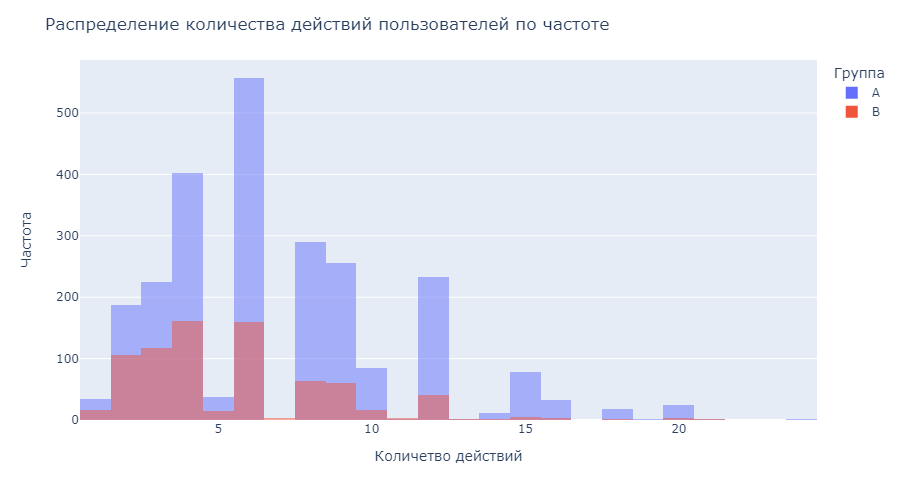

In [20]:
# Сгруппируем пользователей по количеству совершенных действий с разбивкой на группы теста
counts_events_per_user = final_ab_participants.pivot_table(index='user_id', columns='group', values='event_name',\
                                                           aggfunc=['count'])\
                                              .droplevel(level=0, axis=1)

# Построим диаграмму распределения количества событий для обеих групп
fig = px.histogram(counts_events_per_user, color='group', barmode='overlay')

fig.update_layout(title='Распределение количества действий пользователей по частоте',
                  xaxis_title='Количетво действий',
                  yaxis_title='Частота',
                  legend_title_text='Группа',
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Не смотря на малое количество значений прослеживается нормальное распределение количества событий, имеющее схожий вид для обеих групп теста.

Сравним среднее количество событий, совершаемых пользователями, в разных группах теста.

In [21]:
print('Среднее количество событий, совершаемых пользователями группы "А":', round(counts_events_per_user['A'].mean(), 1))
print('Среднее количество событий, совершаемых пользователями группы "В":', round(counts_events_per_user['B'].mean(), 1))

Среднее количество событий, совершаемых пользователями группы "А": 7.0
Среднее количество событий, совершаемых пользователями группы "В": 5.5


Пользователи группы "А" совершают, в среднем, на 1,5 дейтвия больше покупателей группы "В".

### Распределение событий по дням

С целью анализа распределения количества событий по дням создадим отдельный столбец, содержащий только дату события.

In [22]:
final_ab_participants['event_date_ymd'] = pd.to_datetime(final_ab_participants['event_date']).dt.strftime('%Y-%m-%d')
final_ab_participants['event_date_ymd'] = pd.to_datetime(final_ab_participants['event_date_ymd'])

final_ab_participants.head(3)

,user_id,group,ab_test,registration_date,region,registration_device,event_date,event_name,details,event_date_ymd
8,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-20 15:46:06,product_page,NaN,2020-12-20
9,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-21 00:40:59,product_page,NaN,2020-12-21
10,A7A3664BD6242119,A,recommender_system_test,2020-12-20,EU,iPhone,2020-12-25 05:19:45,product_page,NaN,2020-12-25


Сгруппируем датасет по количеству совершенных действий, приходящихся на каждый день исследования, и оценим распределение.

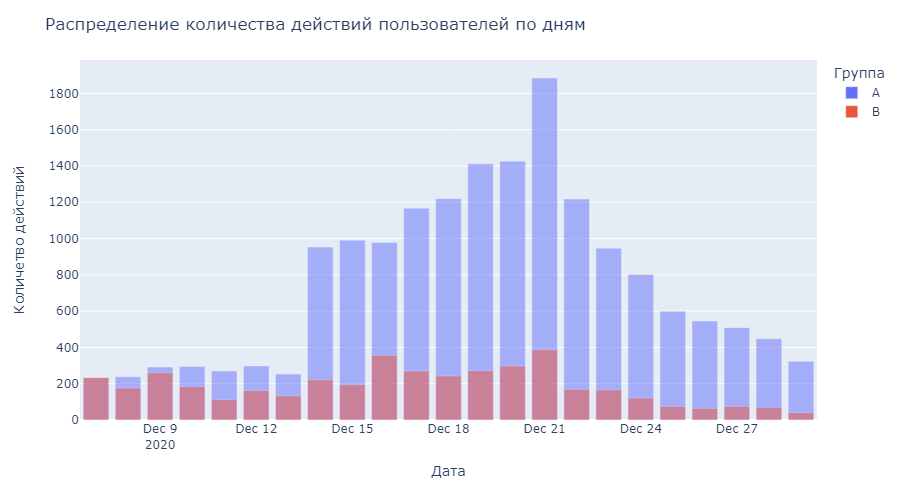

In [23]:
# Сгруппируем даты по количеству совершенных действий с разбивкой на группы теста
counts_events_per_days = final_ab_participants.pivot_table(index='event_date_ymd', columns='group', values='event_name',\
                                                           aggfunc=['count'])\
                                              .droplevel(level=0, axis=1)

# Построим диаграмму распределения количества действий пользователей по датам
fig = px.bar(counts_events_per_days, color='group', barmode='overlay')

fig.update_layout(title='Распределение количества действий пользователей по дням',
                  xaxis_title='Дата',
                  yaxis_title='Количетво действий',
                  legend_title_text='Группа',
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Пик активности пользователей в обеих группах приходится на 15-й день – 21 декабря 2020 года, что совпадает с датой прекращения регистрации новых пользователей на платформе. По 29 декабря пользовательская активность планомерно снижается в обеих группах.

Скорее всего маркетинговое мероприятие, пересекающееся с активностью пользователей с 25 декабря, в меньшей степени повлияет на результаты теста, так как попадет на снижающийся тренд пользовательской активности в этот период.

### Воронка событий

Сформируем и визуализируем воронку событий по количеству уникальных пользователей на каждое событие.

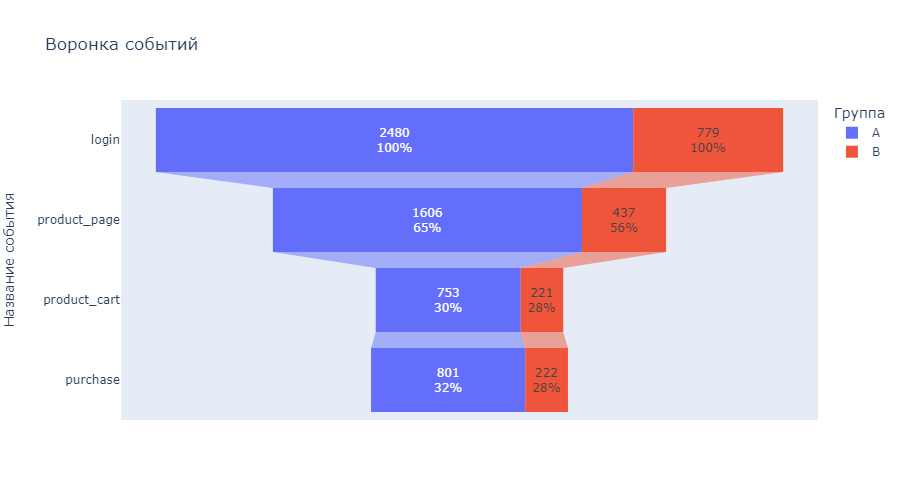

In [24]:
# Группируем события по количеству уникальных пользователей с разбивкой на группы теста
event_funnel = final_ab_participants.pivot_table(index='event_name', columns='group', values='user_id', aggfunc=['nunique'])\
                                    .droplevel(level=0, axis=1)

# Меняем последовательность событий воронки в соответсвтии с порядком целевых действий пользователей
new_order = ['login', 'product_page', 'product_cart', 'purchase']
event_funnel = event_funnel.reindex(new_order)

# Визуализируем воронку событий
fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'A',
    y = event_funnel.index,
    x = event_funnel['A'].tolist(),
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'B',
    y = event_funnel.index,
    x = event_funnel['B'].tolist(),
    textposition = "inside",
    textinfo = "value+percent initial"))

fig.update_layout(title='Воронка событий',
                  yaxis_title='Название события',
                  legend_title_text='Группа',
                  width=900
                 )

static_image_bytes = pio.to_image(fig, format='png')
display(Image(static_image_bytes))

Конверсия тестовой группы "В" хуже конверсии контрольной группы "А" на всех этапах воронки. Только 32 % пользователей группы "А" проходят от авторизации до оплаты товара. Доля пользователей группы "В", совершивших аналогичный путь, составляет 28 %.

Конверсия к событию "product_cart" оказалась ниже конверсии к событию "purchase", что может означать возможность покупки товаров минуя корзину.

### Особенности данных

Низкое соответствие данных техническому заданию (общее количество участников, необходимая аудитория), а также минимальным необходимым условиям успешного проведения теста (количество участников в выборках), может негативно повлиять на точность теста.

## Оценка результатов A/B-тестирования

Выведем и проанализируем воронку событий, а также количество пользователей в каждой из групп.

In [25]:
display(event_funnel)
groups

group,A,B
event_name,,
login,2480,779
product_page,1606,437
product_cart,753,221
purchase,801,222


,user_id,"share, %"
group,,
A,2480,76.1
B,779,23.9


Абсолютно все пользователи обеих групп проходили этап авторизации и количество таких клиентов совпадает с общим числом участников теста в каждой из групп. Учитывая данный факт, производить сравнение пользователей на этапе "login" с общим количеством участников будет некорректно. 

Для дальнейшей проверки гипотез о равенстве долей между остальными группами пользователей воспользуемся z-тестом.

$$ Z \approx \frac{(P_1 - P_2)- (\pi_1 - \pi_2)}{\sqrt{P (1 - P)(1/n_1 + 1/n_2)}} \sim N(0,1) $$

С целью корректного выбора уровня статистической значимости и уменьшения рисков ложноположительного результата при проведении множественной проверки гипотез необходимо воспользоваться поправкой Бонферрони. С этой целью, если мы хотим удержать вероятность ошибки первого рода на уровне 5 %, мы должны разделить этот показатель на количество парных сравнений (3).

Создадим функцию для проверки гипотезы о равенстве долей групп в каждом событии.

In [26]:
def z_test(event_1, event_2, total_1, total_2):
    
    alpha = 0.05/3  # критический уровень статистической значимости c поправкой Бонферони

    buyers = np.array([event_1, event_2])
    all_users = np.array([total_1, total_2])

    p1 = buyers[0]/all_users[0]

    p2 = buyers[1]/all_users[1]
    
    print(buyers[0],buyers[1] , all_users[0], all_users[1])

    p_combined = (buyers[0] + buyers[1]) / (all_users[0] + all_users[1])

    difference = p1 - p2 

    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/all_users[0] + 1/all_users[1]))

    distr = st.norm(0, 1)  

    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-значение: ', p_value)

    if p_value < alpha:
        print('Отвергаем нулевую гипотезу: между долями есть значимая разница')
    else:
        print('Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными')
        
    return

### Проведение теста

Сформируем нулевую и альтернативную гипотезы о равенстве долей пользователей определенного события групп "A" и "B".

*H_0: Доля пользователей определенного события группы "A" = Доля пользователей определенного события группы "B"*

*H_a: Доля пользователей определенного события группы "A" ≠ Доля пользователей определенного события группы "B"*

Сравним доли клиентов, перешедших на страницу товара (product_page) с помощью подготовленной функции.

In [27]:
z_test(event_funnel['A'].values [1], event_funnel['B'].values [1], \
       groups['user_id'].values [0], groups['user_id'].values [1])

1606 437 2480 779
p-значение:  1.3010760377296648e-05
Отвергаем нулевую гипотезу: между долями есть значимая разница


Сравним доли клиентов, перешедших в корзину (product_cart).

In [28]:
z_test(event_funnel['A'].values [2], event_funnel['B'].values [2], \
       groups['user_id'].values [0], groups['user_id'].values [1])

753 221 2480 779
p-значение:  0.2890792534645974
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными


Сравним доли клиентов, оплативших товар (purchase).

In [29]:
z_test(event_funnel['A'].values [3], event_funnel['B'].values [3], \
       groups['user_id'].values [0], groups['user_id'].values [1])

801 222 2480 779
p-значение:  0.0461735302332722
Не получилось отвергнуть нулевую гипотезу: нет оснований считать доли разными


Только в случае сравнения долей пользователей, перешедших на страницу товара, у нас есть основания полагать о наличии статистически значимой разницы между данными группами. Для остальных групп пользователей у нас таких оснований нет.

## Выводы

По итогам проведенного исследования были сделаны следующие выводы:

- Часть данных не соответствовала техническому заданию в связи с чем производилась их корректировка в соответствии с ТЗ;

- Не смотря на малое количество значений прослеживается нормальное распределение количества событий, имеющее схожий вид для обеих групп теста;

- Пик активности пользователей в обеих группах приходится на 15-й день – 21 декабря 2020 года, что совпадает с датой прекращения регистрации новых пользователей на платформе. По 29 декабря пользовательская активность планомерно снижается в обеих группах. Скорее всего маркетинговое мероприятие, пересекающееся с активностью пользователей с 25 декабря, в меньшей степени повлияет на результаты теста, так как попадет на снижающийся тренд пользовательской активности в этот период;

- Конверсия тестовой группы "В" хуже конверсии контрольной группы "А" на всех этапах воронки. Только 32 % пользователей группы "А" проходят от авторизации до оплаты товара. Доля пользователей группы "В", совершивших аналогичный путь, составляет 28 %. Конверсия к событию "product_cart" оказалась ниже конверсии к событию "purchase", что может означать возможность покупки товаров минуя корзину;

- Скорректированные в соответствии с техническим заданием данные обладают минимальными необходимыми условиями для успешного проведения теста, что может негативно повлиять на его точность. Также отмечается несбалансированность выборок;

- В ходе проверки гипотез о равенстве долей между группами было выявлено, что только в случае сравнения долей пользователей, перешедших на страницу товара, у нас есть основания полагать о наличии статистически значимой разницы между данными группами. Для остальных групп пользователей у нас таких оснований нет;

- Результаты проведенного тестирования можно считать не валидными, ввиду малого количества соответствующих ТЗ итоговых данных, несбалансированности выборок и отсутствия статистически значимых различий между данными выборками для большинства событий.